<a href="https://colab.research.google.com/github/anhdtv102/PortfolioProjects/blob/main/IMDb_Movie_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose

This analysis examines a dataset of the 1,000 top-rated IMDB movies from 1920s to 2020s to uncover key insights that can help film directors craft blockbuster hits.

#Data Preparation and Cleaning

In [1]:
%cd /content/drive/MyDrive/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!

/content/drive/MyDrive/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data
data = pd.read_csv("imdb.csv")

In [4]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
#pick necessary variables
df = data[["IMDB_Rating", "Released_Year", "Meta_score", "Runtime", "Gross", "Director"]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDB_Rating    1000 non-null   float64
 1   Released_Year  1000 non-null   object 
 2   Meta_score     843 non-null    float64
 3   Runtime        1000 non-null   object 
 4   Gross          831 non-null    object 
 5   Director       1000 non-null   object 
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [7]:
#convert type of Released Year
df['Released_Year'] = pd.to_numeric(df['Released_Year'],
                                    errors='coerce')

<ipython-input-7-1c156c340dc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Released_Year'] = pd.to_numeric(df['Released_Year'],


In [8]:
#check row 966
df.iloc[966]

,966
IMDB_Rating,7.6
Released_Year,NaN
Meta_score,77.0
Runtime,140 min
Gross,"173,837,933"
Director,Ron Howard


In [9]:
#create a decade variable
df['Decade'] = np.floor(df['Released_Year'] / 10) * 10

<ipython-input-9-05b60a634191>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Decade'] = np.floor(df['Released_Year'] / 10) * 10


In [10]:
#convert and transform Runtime
df['Runtime'] = df['Runtime'].str.replace(" min", "").astype(int)

<ipython-input-10-1045fdfeb799>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime'] = df['Runtime'].str.replace(" min", "").astype(int)


In [11]:
#fill NaN values with zero
df['Gross'] = df['Gross'].fillna(0)
print(df['Gross'].isna().sum())

<ipython-input-11-6db656bff5d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].fillna(0)


0


In [12]:
#convert and transfrom Gross
df['Gross'] = df['Gross'].str.replace(",", "").fillna(0).astype(int)

<ipython-input-12-f0572d0f7428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].str.replace(",", "").fillna(0).astype(int)


In [13]:
df['Gross_mil'] = df['Gross'] / 1000000

<ipython-input-13-e27a287d6a86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross_mil'] = df['Gross'] / 1000000


In [14]:
#get rid of unnecessary columns
df = df.drop(columns=['Released_Year', 'Gross'])

In [15]:
df.head()

,IMDB_Rating,Meta_score,Runtime,Director,Decade,Gross_mil
0,9.3,80.0,142,Frank Darabont,1990.0,28.341469
1,9.2,100.0,175,Francis Ford Coppola,1970.0,134.966411
2,9.0,84.0,152,Christopher Nolan,2000.0,534.858444
3,9.0,90.0,202,Francis Ford Coppola,1970.0,57.300000
4,9.0,96.0,96,Sidney Lumet,1950.0,4.360000


#Exploratory Data Analysis

In [16]:
df.describe()

,IMDB_Rating,Meta_score,Runtime,Decade,Gross_mil
count,1000.000000,843.000000,1000.000000,999.000000,1000.000000
mean,7.949300,77.971530,122.891000,1986.586587,56.536878
std,0.275491,12.376099,28.093671,23.189130,103.238179
min,7.600000,28.000000,45.000000,1920.000000,0.000000
25%,7.700000,70.000000,103.000000,1970.000000,0.445710
50%,7.900000,79.000000,119.000000,1990.000000,10.702751
75%,8.100000,87.000000,137.000000,2000.000000,61.539891
max,9.300000,100.000000,321.000000,2020.000000,936.662225


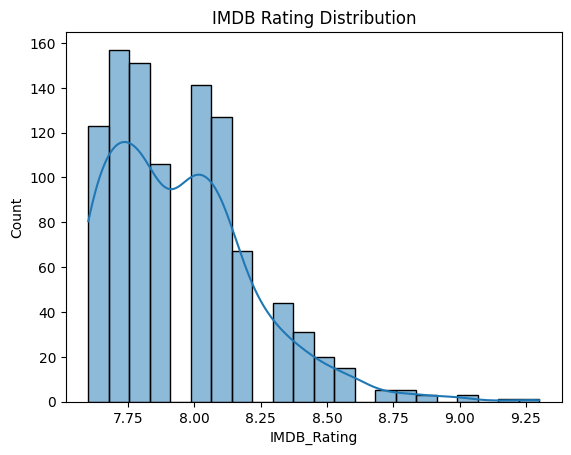

In [17]:
#histogram of the IMDB ratings
sns.histplot(df['IMDB_Rating'], kde=True)
plt.title('IMDB Rating Distribution')
plt.show()

In [18]:
#study the top 10 directors with the highest avg IMDB rating
director_ratings = (df.groupby('Director')['IMDB_Rating']
                    .mean()
                    .sort_values(ascending=False)
                    .head(10))

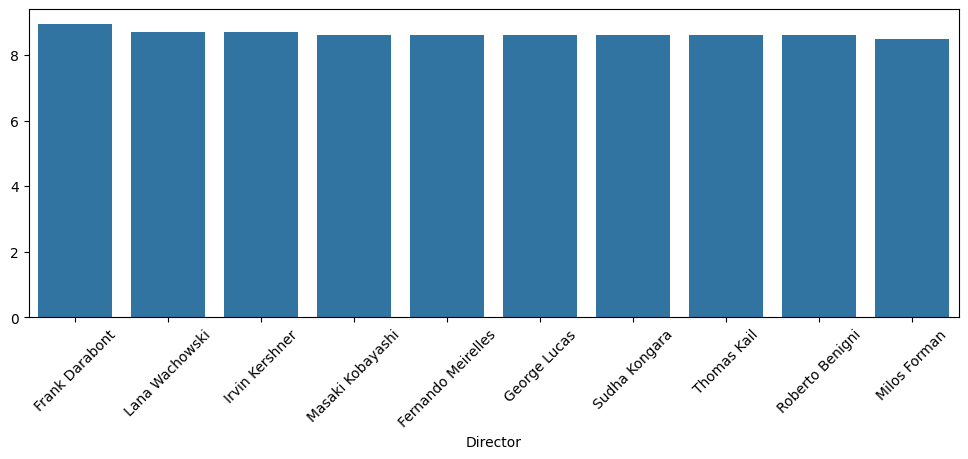

In [19]:
#visualize the mean IMDB ratings for the top 10 directors
plt.figure(figsize = (12, 4))
sns.barplot(x=director_ratings.index,
            y=director_ratings.values)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'IMDB Rating Distribution by Decade')

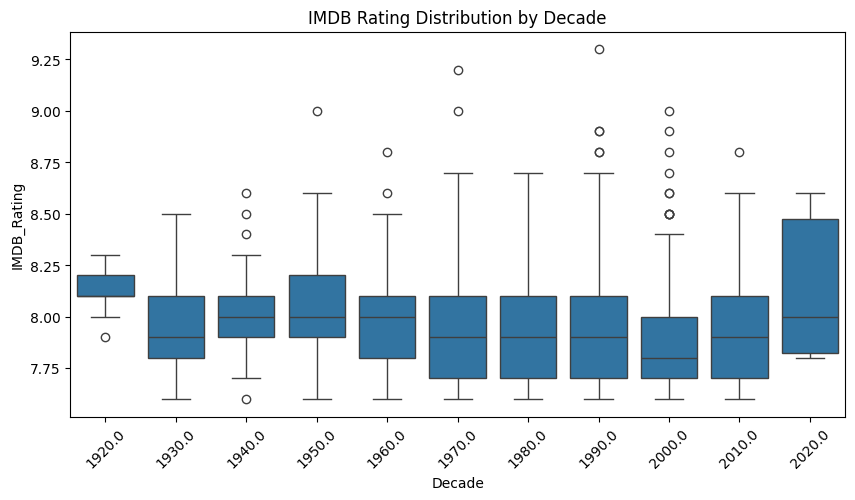

In [20]:
#distribution of IMDB ratings by decade
plt.figure(figsize = (10,5))
sns.boxplot(x='Decade',
            y='IMDB_Rating',
            data=df)
plt.xticks(rotation=45)
plt.title('IMDB Rating Distribution by Decade')

In [21]:
#covariance metrix: the direction of the relationship between variables
df_co = df[['Runtime', 'IMDB_Rating', 'Gross_mil', 'Meta_score']]
df_co.cov()

,Runtime,IMDB_Rating,Gross_mil,Meta_score
Runtime,789.254373,1.881455,417.438934,-10.526302
IMDB_Rating,1.881455,0.075895,2.343023,0.942946
Gross_mil,417.438934,2.343023,10658.121703,-72.676259
Meta_score,-10.526302,0.942946,-72.676259,153.167835


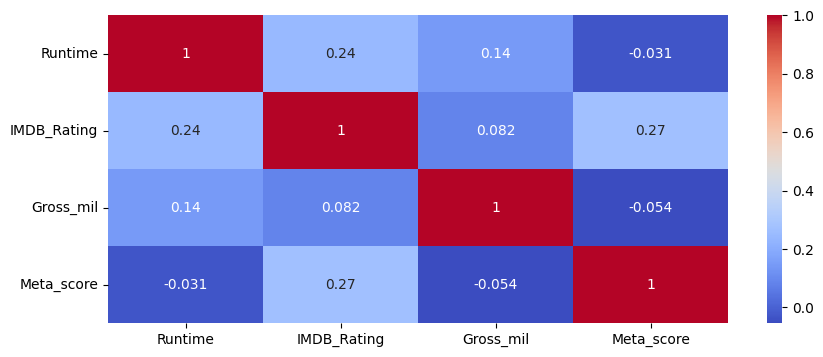

In [22]:
#correlation heatmap: how strong is the relationship
plt.figure(figsize=(10, 4))
sns.heatmap(df_co.corr(),
            annot=True,
            cmap='coolwarm')
plt.show()

#Estimating Average Ratings

In [23]:
#Calculate confidence intervals to estimate the average box office for different decades
#Calculate the mean, the standard deviation and sample size
summary = df.groupby('Decade').agg({'Gross_mil': ['mean', 'std', 'count']})

In [24]:
#rename the columns
summary.columns = ['Gross_mean', 'Gross_std', 'Gross_count']

In [25]:
#calculate SEM (standard error of the sample mean)
summary['Gross_sem'] = summary['Gross_std'] / np.sqrt(summary['Gross_count'])
summary.head()

,Gross_mean,Gross_std,Gross_count,Gross_sem
Decade,,,,
1920.0,1.341802,2.084388,11,0.628467
1930.0,9.968549,40.300467,24,8.226298
1940.0,4.739121,13.376285,35,2.261005
1950.0,7.846706,17.703398,56,2.365716
1960.0,21.234302,35.304236,73,4.132048


In [26]:
#calculate the confidence interval with 95% CL
alpha = 0.05
summary['tscore'] = st.t.ppf(1 - alpha/ 2,
         summary['Gross_count'] - 1)

#confidence interval
summary['lower_ci'] = summary['Gross_mean'] - summary['tscore'] * summary['Gross_sem']
summary['upper_ci'] = summary['Gross_mean'] + summary['tscore'] * summary['Gross_sem']

In [27]:
#display result
summary

,Gross_mean,Gross_std,Gross_count,Gross_sem,tscore,lower_ci,upper_ci
Decade,,,,,,,
1920.0,1.341802,2.084388,11,0.628467,2.228139,-0.058509,2.742113
1930.0,9.968549,40.300467,24,8.226298,2.068658,-7.048845,26.985944
1940.0,4.739121,13.376285,35,2.261005,2.032245,0.144207,9.334036
1950.0,7.846706,17.703398,56,2.365716,2.004045,3.105705,12.587706
1960.0,21.234302,35.304236,73,4.132048,1.993464,12.997214,29.471390
1970.0,41.051211,61.715373,76,7.079239,1.992102,26.948645,55.153778
1980.0,56.013362,78.126921,89,8.281437,1.987290,39.555746,72.470978
1990.0,57.147999,92.390192,150,7.543628,1.976013,42.241692,72.054307
2000.0,63.191930,102.460660,237,6.655535,1.970067,50.080081,76.303779


#Conclusion

1. The average runtime of a highly rated movie is 122 minutes.

2. Frank Darabont made the highest IMDB rated movies.

3. 1950s–1980s consistently have strong ratings with fewer outliers. 2000s and 2010s have many outliers (high-rated movies), meaning some films achieved blockbuster status despite a lower median rating.

4. Runtime has a weak positive correlation with IMDB score and Meta score, which suggests that longer movies tend to get slightly higher audience ratings.

5. IMDB rating and Meta score have a weak correlation with gross revenue. This shows that high audience or critic ratings do not strongly predict box office revenue.

6. Movies in recent decade (1990s - 2010s) earned more money than the previous decades. 2010s had the most variation in earnings, which means some films were massive hits, while others flopped.

# Blockbuster Strategies 🚀

**1. Study the High-Rating Outliers:**


* What themes, genres, or directorial styles led to high ratings?
* Look at 1950s–1980s classics and 2000s–2010s high-rated outliers for inspiration.
* Study low earning movies to see why they fail and what could be done better.

**2. Study audience preferences:**

* Prioritize audience engagement over critic scores.
* Take the inspiration from successful recent hits to align with current trends.

**3. Focus on marketing:**

* Directors should invest in strong marketing and have strategic release dates to maximize box office earnings.
* Aim for high-budget films with mass appeal - big productions consistently earned the most in 1990s, 2000s and 2010s.
* If aiming for Intellectual Propery, ensure that it has sequal potential (John Wick started small but became a franchise).
* Adapt to the trends: streaming, international market and franchise loyalty.